<a href="https://colab.research.google.com/github/suryass24/project/blob/main/customer_sale_tracker_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER MANAGEMENT SYSTEM**

In [1]:
import pandas as pd

  ->1- Data Import and Exploration

Datasets
have 4 csv format file such as

- dim_customer.csv
- dim_market.csv
- dim_product.csv
- fact_sales_monthly.csv

read 4 csv format file data in dataframe

In [4]:
dim_customer=pd.read_csv("/content/dim_customer.csv",encoding='ISO-8859-1')
dim_product=pd.read_csv("/content/dim_product (1).csv",encoding='ISO-8859-1')
dim_market=pd.read_csv("/content/dim_market (1).csv",encoding='ISO-8859-1')
fact_sales_monthly=pd.read_csv("/content/fact_sales_monthly.csv",encoding='ISO-8859-1')

explore fact_Sales_monthly data

In [ ]:
fact_sales_monthly

,date,product_code,customer_code,Qty,net_sales_amount
0,01-09-2018 00:00,A0418150108,90023030,-16,163.98
1,01-09-2018 00:00,A3019150205,90023023,132,698.85
2,01-09-2018 00:00,A3019150205,90023030,111,641.68
3,01-09-2018 00:00,A3019150205,90012041,-59,289.60
4,01-09-2018 00:00,A3019150205,90014141,4,19.95
...,...,...,...,...,...
799957,01-08-2021 00:00,A3019150205,70017060,37,260.80
799958,01-08-2021 00:00,A3019150205,70007199,66,390.05
799959,01-08-2021 00:00,A3019150205,70018115,101,507.93
799960,01-08-2021 00:00,A3019150205,70019204,20,129.95


In [ ]:
fact_sales_monthly.shape

(799962, 5)

In [ ]:
fact_sales_monthly.head()

,date,product_code,customer_code,Qty,net_sales_amount
0,01-09-2018 00:00,A0418150108,90023030,-16,163.98
1,01-09-2018 00:00,A3019150205,90023023,132,698.85
2,01-09-2018 00:00,A3019150205,90023030,111,641.68
3,01-09-2018 00:00,A3019150205,90012041,-59,289.60
4,01-09-2018 00:00,A3019150205,90014141,4,19.95


In [ ]:
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799962 entries, 0 to 799961
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              799962 non-null  object 
 1   product_code      799962 non-null  object 
 2   customer_code     799962 non-null  int64  
 3   Qty               799962 non-null  int64  
 4   net_sales_amount  799962 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 30.5+ MB


In [ ]:
fact_sales_monthly.describe()

,customer_code,Qty,net_sales_amount
count,7.999620e+05,799962.000000,799962.000000
mean,8.563803e+07,50.632374,1103.860317
std,8.079951e+06,201.821364,1989.152675
min,7.000202e+07,-5788.000000,1.060000
25%,9.000200e+07,1.000000,179.210000
50%,9.001118e+07,9.000000,450.665000
75%,9.001810e+07,54.000000,1164.430000
max,9.002303e+07,5832.000000,54453.020000


property that have highest net sales

In [ ]:
fact_sales_monthly.max()

,0
date,01-12-2020 00:00
product_code,A7321160303
customer_code,90023030
Qty,5832
net_sales_amount,54453.02


In [ ]:
fact_sales_monthly[fact_sales_monthly.net_sales_amount==fact_sales_monthly.net_sales_amount.max()]

,date,product_code,customer_code,Qty,net_sales_amount
516377,01-12-2020 00:00,A1319150401,80007196,-718,54453.02


property that have minimum net sales

In [ ]:
fact_sales_monthly.min()

,0
date,01-01-2019 00:00
product_code,A0118150101
customer_code,70002017
Qty,-5788
net_sales_amount,1.06


In [ ]:
fact_sales_monthly[fact_sales_monthly.net_sales_amount==fact_sales_monthly.net_sales_amount.min()]

,date,product_code,customer_code,Qty,net_sales_amount
312800,01-05-2020 00:00,A2118150101,90020101,1,1.06


highest qty value per customer_code

In [ ]:
fact_sales_monthly.groupby("customer_code")["Qty"].sum().sort_values(ascending=False)

,Qty
customer_code,
80007196,1388981
80007195,1285233
90002008,1111219
90002009,845485
80001019,837880
...,...
90019202,17061
90020102,17021
90020098,16940


dim_customer

In [ ]:
dim_customer

,customer_code,customer,market,platform,channel
0,80001019,Neptune,China,Brick & Mortar,Distributor
1,70003182,Atliq e Store,Indonesia,E-Commerce,Direct
2,70003181,AltiQ Exclusive,Indonesia,Brick & Mortar,Direct
3,70007198,AltiQ Exclusive,South Korea,Brick & Mortar,Direct
4,70007199,Atliq e Store,South Korea,E-Commerce,Direct
...,...,...,...,...,...
184,90002014,Expression,India,Brick & Mortar,Retailer
185,90002011,Atliq Exclusive,India,Brick & Mortar,Retailer
186,90002010,Ebay,India,E-Commerce,Retailer
187,90002013,Electricalslytical,India,Brick & Mortar,Retailer


In [ ]:
dim_customer.shape

(189, 5)

In [ ]:
dim_customer.head()

,customer_code,customer,market,platform,channel
0,80001019,Neptune,China,Brick & Mortar,Distributor
1,70003182,Atliq e Store,Indonesia,E-Commerce,Direct
2,70003181,AltiQ Exclusive,Indonesia,Brick & Mortar,Direct
3,70007198,AltiQ Exclusive,South Korea,Brick & Mortar,Direct
4,70007199,Atliq e Store,South Korea,E-Commerce,Direct


In [ ]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  189 non-null    int64 
 1   customer       189 non-null    object
 2   market         189 non-null    object
 3   platform       189 non-null    object
 4   channel        189 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.5+ KB


In [ ]:
dim_customer.describe()

,customer_code
count,1.890000e+02
mean,8.572714e+07
std,8.065775e+06
min,7.000202e+07
25%,9.000200e+07
50%,9.001119e+07
75%,9.001811e+07
max,9.002303e+07


In [ ]:
dim_customer.channel.unique()

array(['Distributor', 'Direct', 'Retailer'], dtype=object)

In [ ]:
dim_customer.market.unique()

array(['China', 'Indonesia', 'South Korea', 'Sweden', 'Pakistan',
       'Bangladesh', 'Philiphines', 'Australia', 'Newzealand', 'Austria',
       'Poland', 'Norway', 'Netherlands', 'Japan', 'France', 'Canada',
       'Germany', 'United Kingdom', 'Spain', 'Italy', 'Portugal', 'USA',
       'India'], dtype=object)

In [ ]:
dim_customer.channel.value_counts()

,count
channel,
Retailer,146
Direct,38
Distributor,5


In [ ]:
dim_customer.market.value_counts()

,count
market,
India,18
USA,13
United Kingdom,11
Canada,11
Japan,10
Portugal,10
Italy,10
Spain,10
Germany,10


Grouping the table by Channel  ="distributor"

In [ ]:
customer=dim_customer.groupby("channel")
customer.get_group("Distributor")

,customer_code,customer,market,platform,channel
0,80001019,Neptune,China,Brick & Mortar,Distributor
9,80007195,Sage,South Korea,Brick & Mortar,Distributor
10,80007196,Leader,South Korea,Brick & Mortar,Distributor
11,80006154,Synthetic,Philiphines,Brick & Mortar,Distributor
12,80006155,Novus,Philiphines,Brick & Mortar,Distributor


dim_product

In [ ]:
dim_product.shape

(298, 6)

In [ ]:
dim_product.head()

,product_code,division,segment,category,product,variant
0,A5721110508,PC,Notebook,Gaming Laptop,AQ Smash 2,Premium Misty Green
1,A5721110507,PC,Notebook,Gaming Laptop,AQ Smash 2,Premium Black
2,A5721110505,PC,Notebook,Gaming Laptop,AQ Smash 2,Plus Cool Blue
3,A5721110504,PC,Notebook,Gaming Laptop,AQ Smash 2,Plus Firey Red
4,A5721110503,PC,Notebook,Gaming Laptop,AQ Smash 2,Standard Black


In [ ]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  298 non-null    object
 1   division      298 non-null    object
 2   segment       298 non-null    object
 3   category      298 non-null    object
 4   product       298 non-null    object
 5   variant       298 non-null    object
dtypes: object(6)
memory usage: 14.1+ KB


In [ ]:
dim_product.describe()

,product_code,division,segment,category,product,variant
count,298,298,298,298,298,298
unique,298,3,6,13,67,22
top,A5721110508,P & A,Accessories,Personal Laptop,AQ Smash 2,Plus 2
freq,1,162,92,53,7,33


In [ ]:
dim_product.segment.unique()

array(['Notebook', 'Networking', 'Storage', 'Desktop', 'Peripherals',
       'Accessories'], dtype=object)

In [ ]:
dim_product.division.unique()

array(['PC', 'N & S', 'P & A'], dtype=object)

In [ ]:
dim_product.segment.value_counts()

,count
segment,
Accessories,92
Notebook,88
Peripherals,70
Storage,27
Desktop,12
Networking,9


In [ ]:
dim_product.division.value_counts()

,count
division,
P & A,162
PC,100
N & S,36


In [ ]:
product=dim_product.groupby("segment")
product.get_group("Networking")

,product_code,division,segment,category,product,variant
88,A7321160303,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Premium
89,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus
90,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
91,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
92,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
93,A7219160201,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Standard
94,A7119160103,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Premium
95,A7119160102,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Plus
96,A7118160101,N & S,Networking,Wi fi extender,AQ Wi Power Dx1,Standard


dim_market


In [ ]:
dim_market.shape

(23, 3)

In [ ]:
dim_market.head()

,market,sub_zone,region
0,Canada,NaN,NaN
1,USA,NaN,NaN
2,United Kingdom,NE,EU
3,Austria,NE,EU
4,Sweden,NE,EU


In [ ]:
dim_market.region.unique()

array([nan, 'EU', 'APAC'], dtype=object)

In [ ]:
dim_market.sub_zone.unique()

array([nan, 'NE', 'SE', 'ROA', 'ANZ', 'India'], dtype=object)

In [ ]:
dim_market.region.value_counts()

,count
region,
EU,11
APAC,10


In [ ]:
dim_market.sub_zone.value_counts()

,count
sub_zone,
NE,7
ROA,7
SE,4
ANZ,2
India,1


In [ ]:
dim_market.isna().sum()

,0
market,0
sub_zone,2
region,2


replace nan as not_available in dim_market

In [ ]:
dim_market.fillna("not_available",inplace=True)
dim_market

,market,sub_zone,region
0,Canada,not_available,not_available
1,USA,not_available,not_available
2,United Kingdom,NE,EU
3,Austria,NE,EU
4,Sweden,NE,EU
5,Spain,SE,EU
6,Portugal,SE,EU
7,Poland,NE,EU
8,Norway,NE,EU
9,Netherlands,NE,EU


In [ ]:
market=dim_market.groupby("sub_zone")
market.get_group("SE")

,market,sub_zone,region
5,Spain,SE,EU
6,Portugal,SE,EU
10,Italy,SE,EU
12,France,SE,EU


-> 2, Data Cleaning

Data cleaning for fact_sales_monthly table

Remove negative values from fact_sales_monthly table

In [ ]:
customer_code=fact_sales_monthly[fact_sales_monthly.Qty<=0]
customer_code

,date,product_code,customer_code,Qty,net_sales_amount
0,01-09-2018 00:00,A0418150108,90023030,-16,163.98
3,01-09-2018 00:00,A3019150205,90012041,-59,289.60
5,01-09-2018 00:00,A3019150205,90005162,-8,41.78
6,01-09-2018 00:00,A3019150205,90017059,-19,95.54
7,01-09-2018 00:00,A3019150205,90007197,-286,1758.71
...,...,...,...,...,...
799920,01-08-2021 00:00,A3019150206,70008170,-280,1554.46
799934,01-08-2021 00:00,A3019150206,70006158,-155,1066.66
799943,01-08-2021 00:00,A3019150205,70010048,-30,175.07
799955,01-08-2021 00:00,A3019150205,70006158,-158,918.60


In [ ]:
product_code=fact_sales_monthly[fact_sales_monthly.Qty>=0]
product_code

,date,product_code,customer_code,Qty,net_sales_amount
1,01-09-2018 00:00,A3019150205,90023023,132,698.85
2,01-09-2018 00:00,A3019150205,90023030,111,641.68
4,01-09-2018 00:00,A3019150205,90014141,4,19.95
8,01-09-2018 00:00,A3019150205,90019203,1,4.51
9,01-09-2018 00:00,A3019150205,90021095,28,145.87
...,...,...,...,...,...
799956,01-08-2021 00:00,A3019150205,70016178,12,78.47
799957,01-08-2021 00:00,A3019150205,70017060,37,260.80
799958,01-08-2021 00:00,A3019150205,70007199,66,390.05
799959,01-08-2021 00:00,A3019150205,70018115,101,507.93


In [ ]:
fact_sales_monthly.shape

(799962, 5)

In [ ]:
customer_code.shape

(160171, 5)

In [ ]:
product_code.shape

(639791, 5)

outlier removal

In [ ]:
fact_sales_monthly.net_sales_amount.min(),fact_sales_monthly.net_sales_amount.max()

(1.06, 54453.02)

In [ ]:
fact_sales_monthly.net_sales_amount.mean(),fact_sales_monthly.net_sales_amount.median()

(1103.860316740045, 450.665)

In [ ]:
fact_sales_monthly.net_sales_amount.std()

1989.1526748954789

In [ ]:
avg,std=fact_sales_monthly.net_sales_amount.mean(),fact_sales_monthly.net_sales_amount.std()
avg,std

(1103.860316740045, 1989.1526748954789)

In [ ]:
3*std

5967.458024686437

In [ ]:
higher_limit=avg+3*std
higher_limit

7071.318341426482

In [ ]:
lower_limit=avg-3*std
lower_limit

-4863.597707946392

In [ ]:
fact_sales_monthly[fact_sales_monthly.net_sales_amount>higher_limit]

,date,product_code,customer_code,Qty,net_sales_amount
888,01-09-2018 00:00,A7119160102,90007197,567.0,8234.76
891,01-09-2018 00:00,A7119160102,90022081,992.0,10980.99
1200,01-09-2018 00:00,A7119160103,90002002,595.0,8451.04
1201,01-09-2018 00:00,A7119160103,90002003,-839.0,10585.48
1203,01-09-2018 00:00,A7119160103,90002006,983.0,13289.38
...,...,...,...,...,...
167339,01-10-2019 00:00,A1118150201,90002001,138.0,7911.85
167343,01-10-2019 00:00,A1118150201,90002006,-150.0,9099.95
167387,01-10-2019 00:00,A1118150201,90022080,109.0,7253.52
167429,01-10-2019 00:00,A1219150301,90002002,126.0,7384.48


In [ ]:
fact_sales_monthly[fact_sales_monthly.net_sales_amount>=higher_limit]

,date,product_code,customer_code,Qty,net_sales_amount
888,01-09-2018 00:00,A7119160102,90007197,567.0,8234.76
891,01-09-2018 00:00,A7119160102,90022081,992.0,10980.99
1200,01-09-2018 00:00,A7119160103,90002002,595.0,8451.04
1201,01-09-2018 00:00,A7119160103,90002003,-839.0,10585.48
1203,01-09-2018 00:00,A7119160103,90002006,983.0,13289.38
...,...,...,...,...,...
167339,01-10-2019 00:00,A1118150201,90002001,138.0,7911.85
167343,01-10-2019 00:00,A1118150201,90002006,-150.0,9099.95
167387,01-10-2019 00:00,A1118150201,90022080,109.0,7253.52
167429,01-10-2019 00:00,A1219150301,90002002,126.0,7384.48


-> Data transformation

In [ ]:
print(fact_sales_monthly.dtypes)

date                 object
product_code         object
customer_code         int64
Qty                   int64
net_sales_amount    float64
dtype: object


In [ ]:
fact_sales_monthly['Qty']=fact_sales_monthly['Qty'].abs()
fact_sales_monthly['Qty']

,Qty
0,16
1,132
2,111
3,59
4,4
...,...
799957,37
799958,66
799959,101
799960,20


In [ ]:
fact_sales_monthly['Qty']= pd.to_numeric(fact_sales_monthly["Qty"], errors="coerce")
fact_sales_monthly["net_sales_amount"] = pd.to_numeric(fact_sales_monthly["net_sales_amount"], errors="coerce")

In [ ]:
fact_sales_monthly["percentage"] = (fact_sales_monthly["Qty"] / fact_sales_monthly["net_sales_amount"])*100
fact_sales_monthly['percentage']

,percentage
0,9.757287
1,18.888173
2,17.298342
3,20.372928
4,20.050125
...,...
799957,14.187117
799958,16.920908
799959,19.884630
799960,15.390535


In [ ]:
fact_sales_monthly

,date,product_code,customer_code,Qty,net_sales_amount,percentage
0,01-09-2018 00:00,A0418150108,90023030,16,163.98,9.757287
1,01-09-2018 00:00,A3019150205,90023023,132,698.85,18.888173
2,01-09-2018 00:00,A3019150205,90023030,111,641.68,17.298342
3,01-09-2018 00:00,A3019150205,90012041,59,289.60,20.372928
4,01-09-2018 00:00,A3019150205,90014141,4,19.95,20.050125
...,...,...,...,...,...,...
799957,01-08-2021 00:00,A3019150205,70017060,37,260.80,14.187117
799958,01-08-2021 00:00,A3019150205,70007199,66,390.05,16.920908
799959,01-08-2021 00:00,A3019150205,70018115,101,507.93,19.884630
799960,01-08-2021 00:00,A3019150205,70019204,20,129.95,15.390535


create percentage column

convert into percentage column

-> Insights generation

find actual average net_Sales_amount percentage rate

merge dim_customer,fact_sales_monthly,dim_product

In [ ]:
join=pd.merge(dim_customer, fact_sales_monthly, on='customer_code')
join.head()


,customer_code,customer,market,platform,channel,date,product_code,Qty,net_sales_amount,percentage
0,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A4319110306,7,836.48,0.836840
1,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3018150201,225,1373.25,16.384489
2,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3018150202,56,274.75,20.382166
3,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3019150204,51,304.26,16.761980
4,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3019150205,52,304.85,17.057569


In [ ]:
join_1=pd.merge(join, dim_product, on='product_code')
join_1.head()

,customer_code,customer,market,platform,channel,date,product_code,Qty,net_sales_amount,percentage,division,segment,category,product,variant
0,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A4319110306,7,836.48,0.836840,PC,Notebook,Personal Laptop,AQ Velocity,Plus Red
1,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3018150201,225,1373.25,16.384489,P & A,Accessories,Keyboard,AQ Master wireless x1,Standard 1
2,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3018150202,56,274.75,20.382166,P & A,Accessories,Keyboard,AQ Master wireless x1,Standard 2
3,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3019150204,51,304.26,16.761980,P & A,Accessories,Keyboard,AQ Master wireless x1,Plus 2
4,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3019150205,52,304.85,17.057569,P & A,Accessories,Keyboard,AQ Master wireless x1,Premium 1


Average net_sales_amount and percentage in each of the market


In [ ]:
join_2=pd.merge(join_1, dim_market, on='market')
join_2.head()

,customer_code,customer,market,platform,channel,date,product_code,Qty,net_sales_amount,percentage,division,segment,category,product,variant,sub_zone,region
0,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A4319110306,7,836.48,0.836840,PC,Notebook,Personal Laptop,AQ Velocity,Plus Red,ROA,APAC
1,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3018150201,225,1373.25,16.384489,P & A,Accessories,Keyboard,AQ Master wireless x1,Standard 1,ROA,APAC
2,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3018150202,56,274.75,20.382166,P & A,Accessories,Keyboard,AQ Master wireless x1,Standard 2,ROA,APAC
3,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3019150204,51,304.26,16.761980,P & A,Accessories,Keyboard,AQ Master wireless x1,Plus 2,ROA,APAC
4,80001019,Neptune,China,Brick & Mortar,Distributor,01-09-2018 00:00,A3019150205,52,304.85,17.057569,P & A,Accessories,Keyboard,AQ Master wireless x1,Premium 1,ROA,APAC


In [ ]:
join.groupby("market")["net_sales_amount"].mean()

,net_sales_amount
market,
Australia,639.305682
Austria,22.949706
Bangladesh,165.885601
Canada,501.167223
China,639.644785
France,486.995929
Germany,302.358398
India,1632.622342
Indonesia,662.047445


In [ ]:
join.groupby("market")["percentage"].mean()

,percentage
market,
Australia,10.036384
Austria,19.016318
Bangladesh,15.671731
Canada,10.792560
China,11.055250
France,10.264021
Germany,12.614074
India,10.068364
Indonesia,10.384274


Average net_Sales_amount and percentage in each of the customer



In [ ]:
join.groupby("customer")["net_sales_amount"].mean()

,net_sales_amount
customer,
Acclaimed Stores,729.134707
All-Out,194.728400
AltiQ Exclusive,679.629750
Amazon,724.701056
Argos (Sainsbury's),175.906773
...,...
UniEuro,382.283779
Vijay Sales,1631.548611
Viveks,1502.671166


In [ ]:
join.groupby("customer")["percentage"].mean()

,percentage
customer,
Acclaimed Stores,9.744298
All-Out,8.989051
AltiQ Exclusive,8.210648
Amazon,9.767893
Argos (Sainsbury's),11.143909
...,...
UniEuro,9.905894
Vijay Sales,10.162932
Viveks,10.206698


Average net_sales_amount and percentage in each of the channel


In [ ]:
join.groupby("channel")["net_sales_amount"].mean()

,net_sales_amount
channel,
Direct,584.837970
Distributor,2611.386650
Retailer,624.720323


In [ ]:
join.groupby("channel")["percentage"].mean()

,percentage
channel,
Direct,11.134092
Distributor,9.800213
Retailer,12.120996


average net_sales amount and percentage in each of the platform

In [ ]:
join.groupby("platform")["net_sales_amount"].mean()

,net_sales_amount
platform,
Brick & Mortar,677.817813
E-Commerce,714.834543


In [ ]:
join.groupby("platform")["percentage"].mean()

,percentage
platform,
Brick & Mortar,11.867826
E-Commerce,11.822010


average net_sales_amount and percentage in each of the date

In [ ]:
join.groupby("date")["net_sales_amount"].mean()

,net_sales_amount
date,
01-01-2019 00:00,575.615185
01-02-2019 00:00,567.864898
01-03-2019 00:00,588.761491
01-04-2019 00:00,589.053364
01-05-2019 00:00,573.088251
01-06-2019 00:00,578.626466
01-07-2019 00:00,593.417787
01-08-2019 00:00,587.948720
01-09-2018 00:00,570.855463


In [ ]:
join.groupby("date")["percentage"].mean()

,percentage
date,
01-01-2019 00:00,12.365985
01-02-2019 00:00,12.306175
01-03-2019 00:00,12.525509
01-04-2019 00:00,12.539508
01-05-2019 00:00,12.378667
01-06-2019 00:00,12.314794
01-07-2019 00:00,12.495320
01-08-2019 00:00,12.562711
01-09-2018 00:00,12.383834


-> Data Visualization

Dataprep Installation

In [7]:
pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 85.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This

Plot Installation

In [8]:
import dataprep
import matplotlib as plt
from dataprep.eda import create_report
import plotly.express as px

<Axes: xlabel='date'>

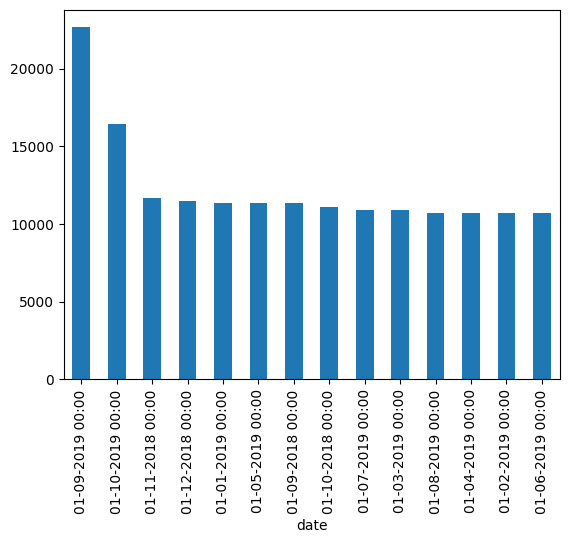

In [ ]:
join.date.value_counts().plot(kind="bar")

Pie chart for platform column

<Axes: ylabel='count'>

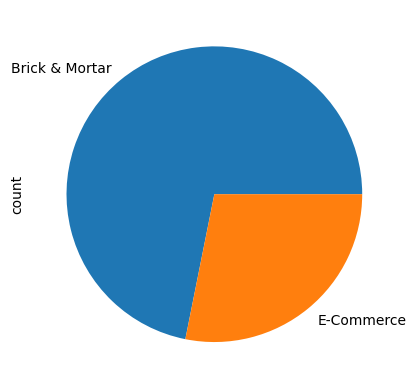

In [ ]:
join.platform.value_counts().plot(kind="pie")

Bar chart for market column where we are customizing color for the bars

<Axes: ylabel='market'>

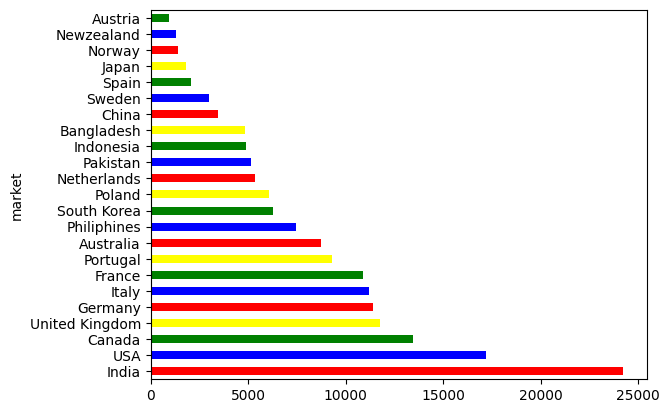

In [ ]:
join.market.value_counts().plot(kind="barh",color=["red","blue","green","yellow"])

Bar chart for customer column using plotly.express library which shows different colors for each and every bar

In [ ]:
customer_counts=join["customer"].value_counts()
fig=px.bar(customer_counts,x=customer_counts.values,y=customer_counts.index,orientation='h', color=customer_counts.values)
fig.show()